# Polar Swarm projection
**Adding libraries**

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np 
import random
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


**loading Iris Data**

In [2]:
data=load_iris()
X=data['data']
y=data['target']

**Distanse matrix ,representing distance betwin high dimensional data**

In [3]:
D=distance_matrix(X,X)

**Databot Class wich reconstruct data point in 2D space**

In [4]:
class DataBot:
    def __init__(self, position,_):
        self.position = position
        self.payoff = 0
        self.ind=_

    def update_payoff(self, R, D,databots):
        weight=np.array([H_weight(distance_2D_polar(self.position,r.position),R) for r in databots])
        self.payoff=np.average(D[self.ind,:],weights=weight)


**polar to cartesian**

In [5]:
def polar_to_cartesian(polar_pos):
    r, phi = polar_pos
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return (x, y)            
            

**H-weight and distance dfinition in 2D space** \
In this section, this is considered as a simplification in the case of alternating two-dimensional space, and this case is not considered for the sake of simplicity.


In [6]:
def H_weight(r,R):
    result=0
    rs=r/(np.pi*R*R)
    if rs<1:
        result=1-rs
    return result 
def distance_2D_polar(a,b):
    x=polar_to_cartesian(a)
    y=polar_to_cartesian(b)
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)


**Updating function** \
Functions updats payoff function as scent.

In [7]:

def updata_all_payoff(R_max,D,databots):
    for _ in databots:
        _.update_payoff(R_max,D,databots)

def update_positions(databots, R, c_R,D):
    for databot in databots:
        if random.random() < c_R:
            new_p=(random.uniform(0, R), random.uniform(0, 2 * np.pi))
            d=DataBot(new_p,databot.ind)
            d.update_payoff(R,D,databots)
            if d.payoff>databot.payoff:
                databot.position=d.position
                databot.payoff=d.payoff



**Initialization**

In [8]:
def initialize_databots(N,D,R_max):
    databots = []
    for _ in range(N):
        position = (random.uniform(0,R_max), random.uniform(0, 2 * np.pi))
        databots.append(DataBot(position,_))
    updata_all_payoff(R_max,D,databots)
    return databots


In [9]:
def calculate_payoff(databot):
    return sum([_.payoff for _ in databot])

def chance(R,max_range=0.5,min_range=0.05,R_max=75.0):
    return min_range+max_range*(R/R_max)



# Pswarm

In [10]:
def pswarm(databots, D, Rmax, Rmin):
    for e in range(int(Rmax),Rmin,-1):
        c_R =chance(e)
        L=calculate_payoff(databots)+100  
        while np.abs(L-calculate_payoff(databots))>0.0000:
            L=calculate_payoff(databots)
            update_positions(databots, e, c_R, D)
    return databots



**Running code**

379.14993203178574


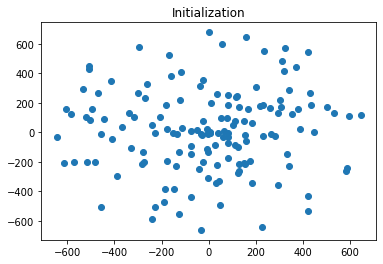

379.3188592622588


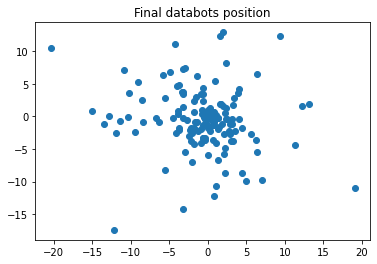

In [11]:
N = 150 
Rmax = 700
Rmin = 2

databots = initialize_databots(N, D=D,R_max=Rmax)
print(calculate_payoff(databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in databots])
plt.title("Initialization")
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.savefig('./report/img/initialization-databots.jpg')
plt.show()

final_databots = pswarm(databots, D=D, Rmax=Rmax, Rmin=Rmin)
print(calculate_payoff(final_databots))
projectedpoints=np.array([list(polar_to_cartesian(_.position)) for _ in final_databots])
plt.scatter(projectedpoints[:,0],projectedpoints[:,1])
plt.title("Final databots position")
plt.savefig('./report/img/fianlprojection2D.jpg')
plt.show()
